In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**Layer Construction**

In [3]:
def add_layer(inputs, in_size, out_size, activation_function=None):
  Weight = tf.Variable(tf.random_normal([in_size,out_size]))
  biases = tf.Variable(tf.zeros([1,out_size]) + 0.1)
  Wx_plus_b = tf.matmul(inputs, Weight) + biases
  if activation_function is None:
    output = Wx_plus_b
  else:
    output = activation_function(Wx_plus_b)
  return output

**Fake Data**

In [4]:
x_data = np.linspace(-1, 1, 300)[:,np.newaxis]
y_data = np.square(x_data) - 0.5

print(x_data)
print(y_data)

noise = np.random.normal(0,0.05,x_data.shape)
y_data += noise

[[-1.        ]
 [-0.99331104]
 [-0.98662207]
 [-0.97993311]
 [-0.97324415]
 [-0.96655518]
 [-0.95986622]
 [-0.95317726]
 [-0.94648829]
 [-0.93979933]
 [-0.93311037]
 [-0.9264214 ]
 [-0.91973244]
 [-0.91304348]
 [-0.90635452]
 [-0.89966555]
 [-0.89297659]
 [-0.88628763]
 [-0.87959866]
 [-0.8729097 ]
 [-0.86622074]
 [-0.85953177]
 [-0.85284281]
 [-0.84615385]
 [-0.83946488]
 [-0.83277592]
 [-0.82608696]
 [-0.81939799]
 [-0.81270903]
 [-0.80602007]
 [-0.7993311 ]
 [-0.79264214]
 [-0.78595318]
 [-0.77926421]
 [-0.77257525]
 [-0.76588629]
 [-0.75919732]
 [-0.75250836]
 [-0.7458194 ]
 [-0.73913043]
 [-0.73244147]
 [-0.72575251]
 [-0.71906355]
 [-0.71237458]
 [-0.70568562]
 [-0.69899666]
 [-0.69230769]
 [-0.68561873]
 [-0.67892977]
 [-0.6722408 ]
 [-0.66555184]
 [-0.65886288]
 [-0.65217391]
 [-0.64548495]
 [-0.63879599]
 [-0.63210702]
 [-0.62541806]
 [-0.6187291 ]
 [-0.61204013]
 [-0.60535117]
 [-0.59866221]
 [-0.59197324]
 [-0.58528428]
 [-0.57859532]
 [-0.57190635]
 [-0.56521739]
 [-0.55852

In [5]:
xs = tf.placeholder(dtype=tf.float32,shape=[None,1])
ys = tf.placeholder(dtype=tf.float32,shape=[None,1])

In [6]:
l1 = add_layer(inputs=xs, in_size=1, out_size=10, activation_function=tf.nn.relu)
prediction = add_layer(inputs=l1, in_size=10, out_size=1, activation_function=None)

**Loss and Optimizer**

In [7]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(y_data - prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

In [8]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


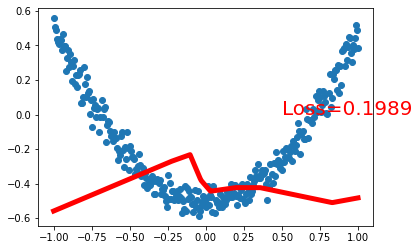

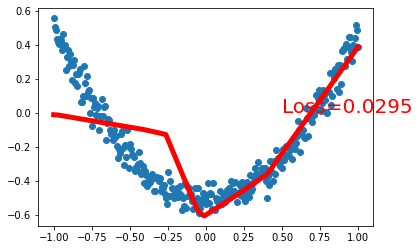

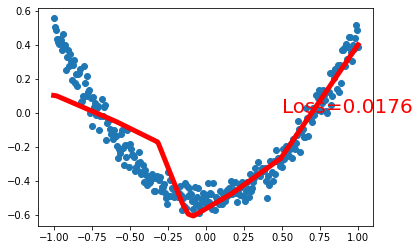

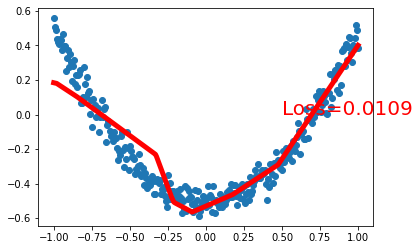

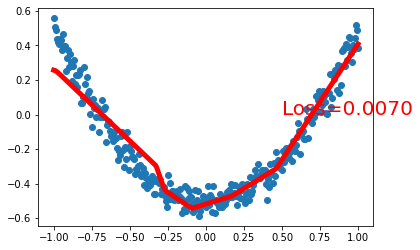

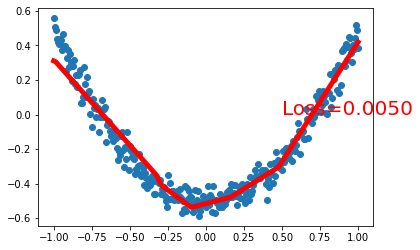

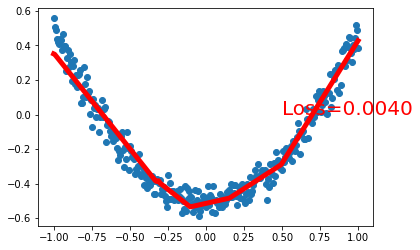

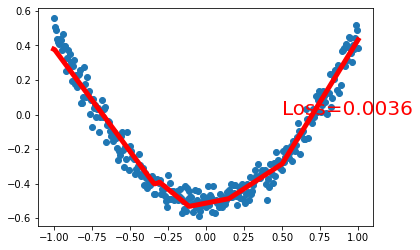

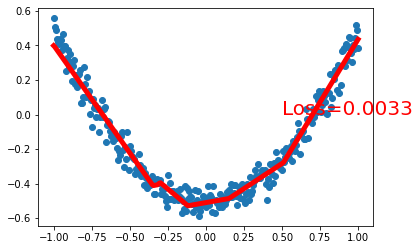

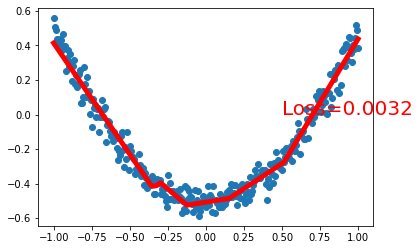

In [10]:
for epoch in range(1000):
  sess.run(train_step, feed_dict={xs: x_data, ys:y_data})
  if epoch % 100 == 0:
    curr_loss = sess.run(loss, feed_dict={xs: x_data, ys:y_data})
    prediction_data = sess.run(prediction, feed_dict={xs: x_data})
    plt.cla()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_data, 'r-', lw=5)
    plt.text(0.5, 0, 'Loss=%.4f'%curr_loss, fontdict={'size': 20, 'color':  'red'})
    plt.pause(0.1)